# 线性回归

&emsp;&emsp;线性回归主要用于预测。举个栗子：
> 某地区2007年至2013年农村居民家庭纯收入y（单位：千元）的数据如下表：  

> 年份 $x$| 2007 | 2008 | 2009 | 2010 | 2011 | 2012 | 2013 |  
> -|-|-|-|-|-|-|-  
> **人均纯收入 $y$** | **2.9** | **3.3** | **3.6** | **4.4** | **4.8** | **5.2** | **5.9**

> <center><font color=gray>数据集1</font></center>

> 问：该地区2015年农村居民家庭纯收入是多少？  

&emsp;&emsp;在这个任务中，我们要预测的是某个不在数据集的年份的收入。

## 使用线性回归的前提

&emsp;&emsp;使用线性回归的一个基本的条件是（1）数据基本是线性的。简单来说，如果把数据放到一个坐标系上，每一个数据是一个点，那么大多数点应该基本在一条直线上，或靠近这条直线，只有少数或没有数据远离这条直线。（2）通常，当不存在一条直线能穿过全部点的时候，我们才用线性回归，否则可以直接通过初中学过的通过求斜率和截距的方法得到这条直线。

&emsp;&emsp;【例1】判断数据集1能用线性回归模型预测某年份农村居民纯收入。  
&emsp;&emsp;证：  
&emsp;&emsp;&emsp;&emsp;可视化数据：

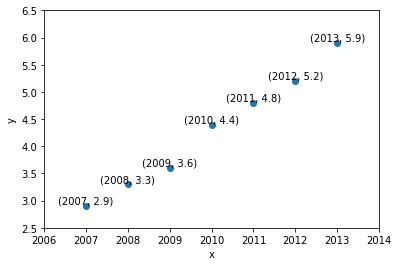

In [1]:
import matplotlib.pyplot as plt

x = [2007, 2008, 2009, 2010, 2011, 2012, 2013]
y = [2.9, 3.3, 3.6, 4.4, 4.8, 5.2, 5.9]

plt.scatter(x, y)
plt.axis([2006, 2014, 2.5, 6.5])
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10)  
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_1.png)
<center><font color=gray>图1</font></center>

&emsp;&emsp;把这些点全连起来得到：

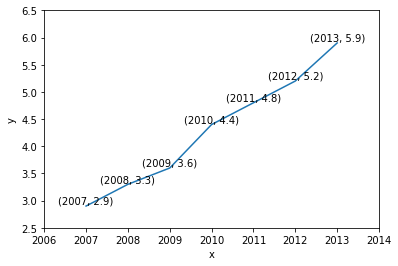

In [3]:
plt.plot(x, y)
plt.axis([2006, 2014, 2.5, 6.5])
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10)  
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_2.png)  
<center><font color=gray>图2</font></center>

&emsp;&emsp;图像中每一个点代表特定年份对应的收入。这些点（1）大概落在一条直线附近，但（2）不存在一条直线能穿过全部点，因此可以使用线性回归预测某个不在数据集中的年份的纯收入。

## 我们要找一条直线

&emsp;&emsp;数据集1上的数据都落在某一条直线附近。我们可以推测，其他年份的数据也在这条直线附近，也就是说，已知和未知的数据都分布在这条直线上。或许，这条直线可能是下图的蓝色线，而对于某一个数据集1上没有的年份的收入，比如2006年的收入，可能是下图的红色小点点：

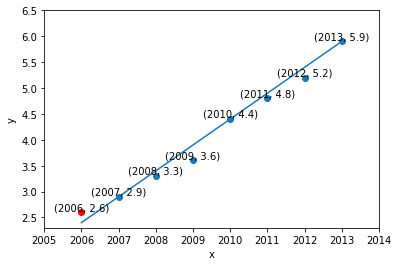

In [9]:
plt.scatter(x, y)
plt.axis([2005, 2014, 2.3, 6.5])
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10) 
plt.scatter(2006, 2.6, c="r")
plt.text(2006, 2.6, (2006, 2.6), ha="center", va="bottom", fontsize=10)
plt.plot([2006, 2013], [2.4, 5.9])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_3.png)  
<center><font>图3</font></center>

&emsp;&emsp;现在，我们要做的就是**找出一条直线，使每一个数据集1上有的点都尽可能地分布在这条直线附近。因为我们推测已知数据和未知数据都分布在一条直线附近，给定一个不在数据集上的输入，即未知数据（对数据集1而言就是2007-2013年之外的年份，如2006年），我们可以通过找出这个输入在直线上对应的位置得到一个输出（我们预测的这个年份的收入），并把这个输出近似地当作是真实的值。**  
&emsp;&emsp;按照机器学习的约定，我们把像数据集1中年份这样的数据称作**输入**，即自变量，坐标系中横轴的值；把像数据集1中收入这样的需要预测的值称作**输出**，即因变量，坐标系中纵轴的值。用直线求出的值称作**预测值**，实际的值（我们可能不知道，所以才需要线性回归“预测”这个真实值）称作**真实值**。  
&emsp;&emsp;对数据集1而言，我们判断出年份是输入，收入是输出，因为问题提供的是年份，我们要预测的是收入。

&emsp;&emsp;老师告诉我们，直线可以用
$$y = k \cdot x + b \tag{1}$$
表示出来。其中，
+ x：表示输入；
+ y：表示输出；
+ k：表示斜率。k越大，直线越倾斜；
+ b：表示截距，即直线与y轴的交点与坐标系纵轴的距离。  

&emsp;&emsp;对这个直线方程的详细介绍可以参考初中数学教材（好像是初中吧），在此不赘述。

&emsp;&emsp;现在我们把符号换一下，变成：
$$\hat y = \theta_1 \cdot x + \theta_0 \tag{2}$$
其中
+ x：表示输入；
+ $\hat y$：表示输出；
+ $\theta_1$：表示斜率。\theta_1越大，直线越倾斜；
+ $\theta_0$：表示截距，即直线与y轴的交点与坐标系纵轴的距离。


&emsp;&emsp;$\theta_0$和$\theta_1$的含义和$k$，$b$的含义相同，但这里的$\hat y$有个小帽子，其实这和(1)中的$y$含义是一样的，表示直线的输出值，即$\theta_1 \cdot x + \theta_0$的结果。这个小帽子代表“预测值”。而对于真实值，我们用没有小帽子的$y$表示。  
&emsp;&emsp;具体来说，给定一个年份，比如2006年，我们根据得到的直线（假设我们已经找出这条直线，是 $\hat y = 0.5 \cdot x - 1000.6$）得到2006年的收入是：$0.5 * 2006 - 1000.6 = 2.4$，这里的2.4就是$\hat y$。2006年的实际收入，即2006年数据的实际值，是$y$。

## 把这条直线确定下来。

&emsp;&emsp;现在，我们还不知道哪条直线最好地穿过所有已知的数据，那就随便找一条呗～随便让$\theta_1$，$\theta_2$取个值，比如$\theta_1 = 0.2$，$\theta_0 = -500$。画出这条直线如图：

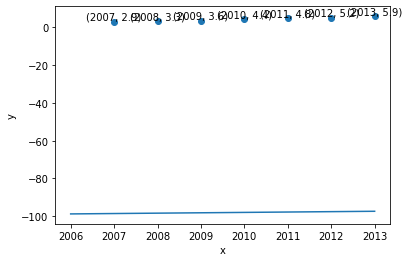

In [36]:
def f1(x):
    return x * 0.2 - 500

plt.scatter(x, y)
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10) 
plt.plot([2006, 2013], [f1(2006), f1(2013)])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_4.png)  
<center><font>图4</font></center>

&emsp;&emsp;umm...相差有点大。那就试试$\theta_1 = 0.5$，$\theta_0 = -1000$

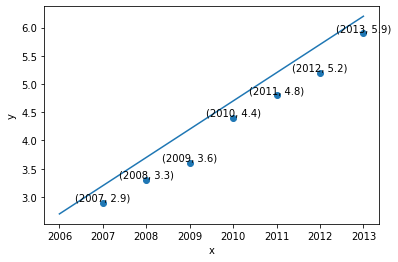

In [39]:
def f2(x):
    return x * 0.5 - 1000.3

plt.scatter(x, y)
for i, j in zip(x, y):  
    plt.text(i, j, (i,j), ha='center', va='bottom', fontsize=10) 
plt.plot([2006, 2013], [f2(2006), f2(2013)])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

![png](figure_5.png)  
<center><font>图5</font></center>

&emsp;&emsp;这条看起来好多了OwO。我们可以继续改变$\theta_1$，$\theta_2$的值，直到找到一条尽可能穿过全部已知数据点的直线。但这不是